In [1]:
# %matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [3]:
# Source(s): U.S. Census Bureau, 2014-2018 American Community Survey 5-Year Estimates 

In [62]:
# Read in the Median_Household_Income_by_County data
income_df = pd.read_csv('../Resources/Median_Household_Income_by_County.csv')
income_df.head()



,County,Income,Margin Of Error
0,Alameda County,92574.0,"+/- $1,023"
1,Alpine County,64688.0,"+/- $12,933"
2,Amador County,61198.0,"+/- $3,241"
3,Butte County,48443.0,"+/- $1,477"
4,Calaveras County,58151.0,"+/- $3,310"


In [50]:
income = income_df[['County','Income']]
income = income.dropna()
income = income.sort_values(by=['Income'],ascending=False).reset_index(drop=True)
income['County'] = income['County'].replace(' County', '', regex=True)
income.head()
# income[income['County'] == 'Alpine County']

,County,Income
0,Santa Clara,116178.0
1,San Mateo,113776.0
2,Marin,110217.0
3,San Francisco,104552.0
4,Contra Costa,93712.0


In [63]:
# Income = income_df['Income']
mean_numpy = np.mean(Income)
print(f"The mean of median income in CA is {round(mean_numpy,0)}")

The mean of median income in CA is 64379.0


In [64]:
median_numpy = np.median(income.Income)
print(f"The median of median income in CA is {median_numpy}")

The median of median income in CA is 59157.5


In [65]:
top_income = income.head(10)
top_income

,County,Income
0,Santa Clara,116178.0
1,San Mateo,113776.0
2,Marin,110217.0
3,San Francisco,104552.0
4,Contra Costa,93712.0
5,Alameda,92574.0
6,Orange,85398.0
7,Napa,84753.0
8,Placer,84357.0
9,Ventura,84017.0


In [66]:
x_axis = np.arange(len(income))
tick_locations = [value+0.4 for value in x_axis]

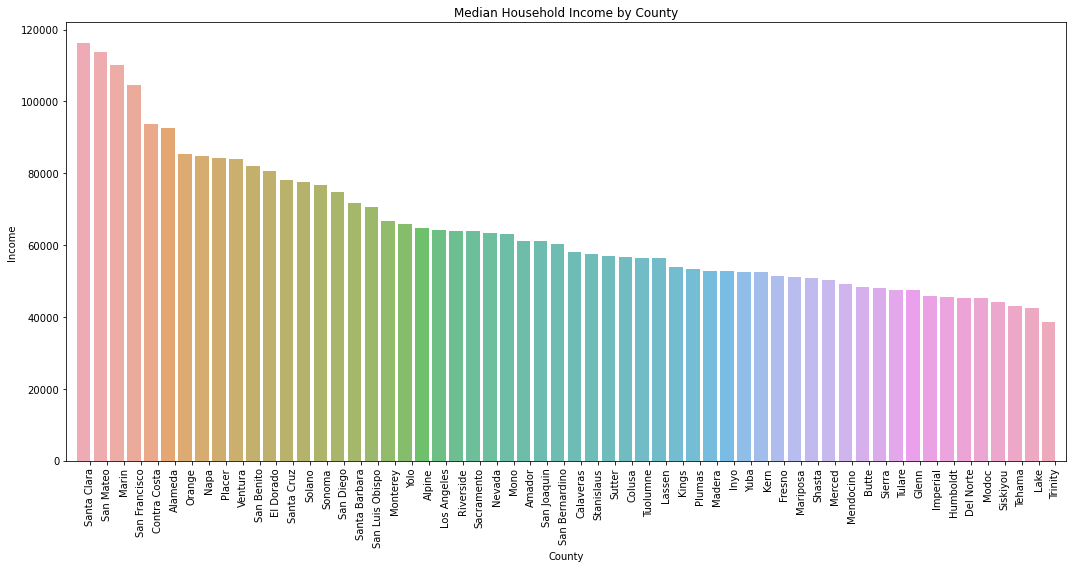

In [67]:
# Characterize the data set using matplotlib 
plt.figure(figsize=(15,8))
# plt.bar(x_axis, income['Income'], color='r',alpha=0.75, align="edge")
sns.barplot(x_axis, income['Income'], alpha=0.8)


plt.title("Median Household Income by County")
plt.xlabel('County')
plt.ylabel('Income')

plt.xticks(tick_locations, income['County'], rotation="vertical")
plt.xlim(-1, 58)
plt.tight_layout()
plt.savefig("Income_County.png")
plt.show()


In [75]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(income.Income)
print(f"The income variance using the NumPy module is {round (var_numpy,0)}")

sd_numpy = np.std(income.Income,ddof = 0)
print(f"The income standard deviation using the NumPy module is {round (sd_numpy,0)}")

The income variance using the NumPy module is 346286963.0
The income standard deviation using the NumPy module is 18609.0


In [69]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the median-income is between {round(mean_numpy-sd_numpy,0)} and {round(mean_numpy+sd_numpy,0)}")
print(f"Roughly 95% of the median-income is between {round(mean_numpy-2*sd_numpy,0)} and {round(mean_numpy+2*sd_numpy,0)}")
print(f"Roughly 99.7% of the median-income is between {round(mean_numpy-3*sd_numpy,0)} and {round(mean_numpy+3*sd_numpy,0)}")

Roughly 68% of the median-income is between 45770.0 and 82987.0
Roughly 95% of the median-income is between 27161.0 and 101596.0
Roughly 99.7% of the median-income is between 8552.0 and 120205.0


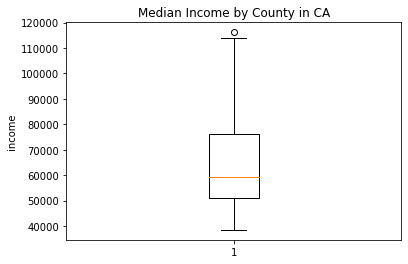

In [70]:
fig1, ax1 = plt.subplots()
ax1.set_title('Median Income by County in CA')
ax1.set_ylabel('income')
ax1.boxplot(income.Income)
plt.show()

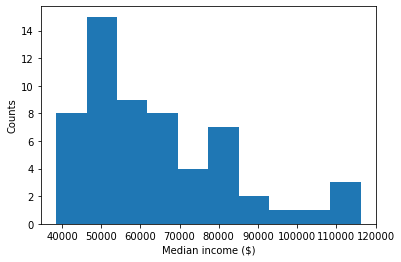

In [74]:
plt.hist(income.Income)
plt.xlabel('Median income ($)')
plt.ylabel('Counts')
plt.show()